# Flatiron School Phase 4 Project

Student name: **Angelo Turri**

Student pace: **self paced**

Project finish date: ****

Instructor name: **Mark Barbour**

Blog post URL: **[x]**

# INTRODUCTION

### Stakeholder



### Data: Origin & Usage



### Methods Justification & Value to Stakeholder



### Limitations



### Model Evaluation



In [353]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import clear_output, display_html
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
import time
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.float_format = '{:.10f}'.format

In [3]:
data = pd.read_csv('data/zillow_data.csv')

In [4]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
#     return melted.groupby('time').aggregate({'value':'mean'})
    melted.set_index('time', inplace=True)
    return melted

In [5]:
df = melt_data(data)

df['zipcount'] = df['RegionName'].map(df.RegionName.value_counts())

df = df[df.zipcount==265]

In [6]:
ad_2012 = df[df.index>'2011-12-1'].copy()
grouped = ad_2012.groupby('time').aggregate({'value':'mean'})

In [14]:
test

time
2017-01-01     997000.0
2017-02-01     993700.0
2017-03-01     991300.0
2017-04-01     989200.0
2017-05-01     991300.0
2017-06-01     999100.0
2017-07-01    1005500.0
2017-08-01    1007500.0
2017-09-01    1007800.0
2017-10-01    1009600.0
2017-11-01    1013300.0
2017-12-01    1018700.0
2018-01-01    1024400.0
2018-02-01    1030700.0
2018-03-01    1033800.0
2018-04-01    1030600.0
Name: value, dtype: float64

In [95]:
summaries, originals, trainps, testps, ps, test_mses, train_mses, test_maes, train_maes, test_rmses, train_rmses, resids, statistics, pvalues, cvs, kstatistics, kpvalues, kcvs = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],

st = time.time()

for i in range(ad_2012.RegionName.nunique()):
    
    zipcode = ad_2012.RegionName.unique()[i]
    
    zc = ad_2012[ad_2012.RegionName==zipcode].value
    originals.append(zc)
    
    train = zc[zc.index<'2017-01-01']
    test = zc[zc.index>'2016-12-01'] 
    
    model = ARIMA(train, order = (1,1,1)).fit()
    summaries.append(model.summary())
    
    train_preds = model.predict()
    test_preds = model.get_forecast(steps=16).predicted_mean
    preds = model.get_forecast(steps=28).predicted_mean
    trainps.append(train_preds)
    testps.append(test_preds)
    ps.append(preds)
    
    test_mse = mean_squared_error(test, test_preds)
    train_mse = mean_squared_error(train[1:], train_preds[1:])
    test_mses.append(test_mse)
    train_mses.append(train_mse)
    
    test_mae = mean_absolute_error(test, test_preds)
    train_mae = mean_absolute_error(train[1:], train_preds[1:])
    test_maes.append(test_mae)
    train_maes.append(train_mae)
    
    test_rmse = mean_squared_error(test, test_preds, squared=False)
    train_rmse = mean_squared_error(train[1:], train_preds[1:], squared=False)
    test_rmses.append(test_rmse)
    train_rmses.append(train_rmse)
    
    residuals = train_preds[1:]-train[1:]
    resids.append(residuals)
    
    dftest = adfuller(residuals)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    statistics.append(dfoutput['Test Statistic'])
    pvalues.append(dfoutput['p-value'])
    cvs.append(dfoutput['Critical Value (5%)'])
    
    kpsstest = kpss(zc, regression='ct')
    kstatistics.append(kpsstest[0])
    kpvalues.append(kpsstest[1])
    kcvs.append(kpss(zc, regression='ct')[3]['5%'])
    
    clear_output(wait=True)
    print(f"Zipcode #{i} done.")
    
elapsed_time = time.time() - st
print(elapsed_time)

Zipcode #13683 done.
570.9751808643341


In [ ]:
first_round_arima = pd.DataFrame({'zipcode': ad_2012.RegionName.unique(), 
                                  'train_mse': train_mses, 
                                  'test_mse': test_mses, 
                                  'train_mae': train_maes, 
                                  'test_maes': test_maes, 
                                  'train_rmses': train_rmses, 
                                  'test_rmses': test_rmses,
                                  'adfuller_statistic': statistics, 
                                  'adfuller_pvalue': pvalues, 
                                  'adfuller_cv': cvs, 
                                  'kpss_statistic': kstatistics, 
                                  'kpss_pvalue': kpvalues, 
                                  'kpss_cv': kcvs, 
                                  'residuals': resids, 
                                  'train_preds': trainps, 
                                  'test_preds': testps, 
                                  'preds': ps, 
                                  'original': originals})

In [313]:
first_round_arima.head()

,zipcode,train_mse,test_mse,adfuller_statistic,adfuller_pvalue,adfuller_cv,kpss_statistic,kpss_pvalue,kpss_cv,residuals,train_preds,test_preds,preds
0,60657,9.103480e+09,3.189090e+08,-2.176987,0.214704,-2.925338,0.220688,0.010000,0.146,2012-02-01 2664.637238 2012-03-01 -149...,2012-01-01 0.000000 2012-02-01 7363...,2017-01-01 998692.731231 2017-02-01 9986...,2017-01-01 998692.731231 2017-02-01 9986...
1,75070,6.648758e+08,5.223802e+06,-3.731880,0.003686,-2.915731,0.144581,0.052628,0.146,2012-02-01 1176.269322 2012-03-01 1055.5...,2012-01-01 0.000000 2012-02-01 2012...,2017-01-01 300680.236302 2017-02-01 3023...,2017-01-01 300680.236302 2017-02-01 3023...
2,77494,1.031553e+09,2.043555e+08,-1.869143,0.346713,-2.914731,0.265443,0.010000,0.146,2012-02-01 -1717.195875 2012-03-01 97.2...,2012-01-01 0.000000 2012-02-01 2498...,2017-01-01 325781.633810 2017-02-01 3270...,2017-01-01 325781.633810 2017-02-01 3270...
3,60614,1.444272e+10,6.695824e+08,-1.625682,0.469752,-2.920142,0.285856,0.010000,0.146,2012-02-01 3938.660720 2012-03-01 -1261...,2012-01-01 0.000000e+00 2012-02-01 9.278...,2017-01-01 1.267892e+06 2017-02-01 1.267...,2017-01-01 1.267892e+06 2017-02-01 1.267...
4,79936,2.106777e+08,1.057878e+07,-3.318589,0.014068,-2.918973,0.188885,0.020168,0.146,2012-02-01 506.850235 2012-03-01 -4.413...,2012-01-01 0.000000 2012-02-01 1127...,2017-01-01 116337.243938 2017-02-01 1163...,2017-01-01 116337.243938 2017-02-01 1163...


In [165]:
zipdf = ad_2012[ad_2012.RegionName==77084].value

train = zip_60657[zipdf.index<'2017-01-01']
test = zip_60657[zipdf.index>'2016-12-01']

In [202]:
model = ARIMA(train, order = (1,1,1)).fit()

In [203]:
forecast = model.get_forecast(steps=len(test))

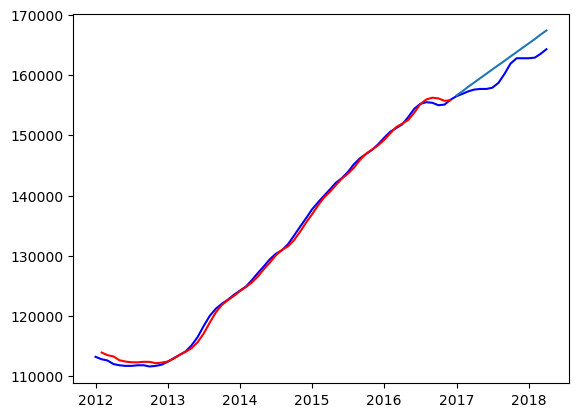

In [204]:
plt.plot(zip_60657.index, zip_60657, c='blue', label='original')
plt.plot(model.predict()[1:], c='red', label='train predictions')
plt.plot(forecast.predicted_mean, label='test predictions')

In [259]:
print(model.summary().tables[0][2][3])

922.172


In [261]:
print(model.summary().tables[0][3][3])

928.404


In [237]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -458.086
Date:                Thu, 04 Jan 2024   AIC                            922.172
Time:                        14:23:40   BIC                            928.404
Sample:                    01-01-2012   HQIC                           924.605
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.006    173.596      0.000       0.989       1.011
ma.L1         -0.9988      0.129     -7.743      0.000      -1.252      -0.746
sigma2      3.225e+05   1.55e-07   2.08e+12      0.000    3.23e+05    3.23e+05
===================================================================================
Ljung-Box (L1) (Q):                  42.38   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.00   Prob(JB):                         0.34
Heteroskedasticity (H):               0.39   Skew:                            -0.44
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.64e+27. Standard errors may be unstable.
"""

In [316]:
# models = []

# p_params = [0, 1]
# d_params = [0, 1]
# q_params = [0, 1]
# P_params = [0, 1]
# D_params = [0, 1]
# Q_params = [0, 1]
# m_params = [3, 6, 12]
# # create config instances
# for p in p_params:
#     for d in d_params:
#         for q in q_params:
#                 for P in P_params:
#                     for D in D_params:
#                         for Q in Q_params:
#                             for m in m_params:
#                                 cfg = [(p, d, q), (P, D, Q, m)]
#                                 models.append(cfg)

In [993]:
# tups = []

# p_params = [1]
# d_params = [1]
# q_params = [1]
# P_params = range(3)
# D_params = range(3)
# Q_params = range(3)
# m_params = [12]

# for p in p_params:
#     for d in d_params:
#         for q in q_params:
#             cfg = [p, d, q]
#             tups.append(cfg)
            
# # tups.remove([0, 0, 0])

# seasonal_models = []

# for P in P_params:
#     for D in D_params:
#         for Q in Q_params:
#             for m in m_params:
#                 cfg = [tups[0], [P, D, Q, m]]
#                 seasonal_models.append(cfg)
            
# # seasonal_models.remove([[1, 0, 0], [1, 0, 1, 6]])
            
# len(seasonal_models) + len(tups)

28

In [1008]:
tups = []

p_params = [0, 1]
d_params = [0, 1]
q_params = [0, 1]
m_params = [12]

for p in p_params:
    for d in d_params:
        for q in q_params:
            cfg = [p, d, q]
            tups.append(cfg)
            
tups.remove([0, 0, 0])

seasonal_models = []

for arima_order in tups:
    for seasonal_order in tups:
        for m in m_params:
            cfg = [arima_order, seasonal_order + [m]]
            seasonal_models.append(cfg)
            
# seasonal_models.remove([[1, 0, 0], [1, 0, 1, 6]])
            
len(seasonal_models) + len(tups)

56

In [ ]:
execution_times = {}

for solver in ['nm', 'bfgs', 'lbfgs', 'powell', 'cg']:
    st = time.time()

    aics, bics = [], []

    for i in range(len(seasonal_models)):
        m = seasonal_models[i]
        model = SARIMAX(train, order=m[0], seasonal_order=m[1]).fit(disp=False, method=solver)
        aics.append(model.aic)
        bics.append(model.bic)
        clear_output(wait=True)
        print(f"SARIMAX model #{i+1}/{len(seasonal_models)} done.")
        print(f"Solver: {solver}")

    elapsed_time = time.time() - st
    print("Execution time: " + str(elapsed_time) + " seconds")
    
    execution_times[solver] = elapsed_time

In [ ]:
execution_times

# Hyperparameter tuning

In [1010]:
# percentage_increases = []

# for zipcode in ad_2012.RegionName.unique():
#     zc = ad_2012[ad_2012.RegionName==zipcode].value
#     percentage_increase = (zc.iloc[-1] / zc.iloc[0])
#     percentage_increases.append(percentage_increase)

# increases = pd.DataFrame({'zipcode': ad_2012.RegionName.unique(), 'percentage_increase': percentage_increases})

In [1060]:
increases.sort_values(by='percentage_increase', ascending=False).query('percentage_increase>1 & percentage_increase<1.05').head(20)

,zipcode,percentage_increase
8916,8848,1.049981
1190,28306,1.049921
6007,18302,1.049919
1719,61704,1.049870
10249,28717,1.049838
10908,17065,1.049771
9927,8518,1.049764
8120,62024,1.049598
5929,6804,1.049564
10944,10993,1.049285


<Axes: xlabel='time'>

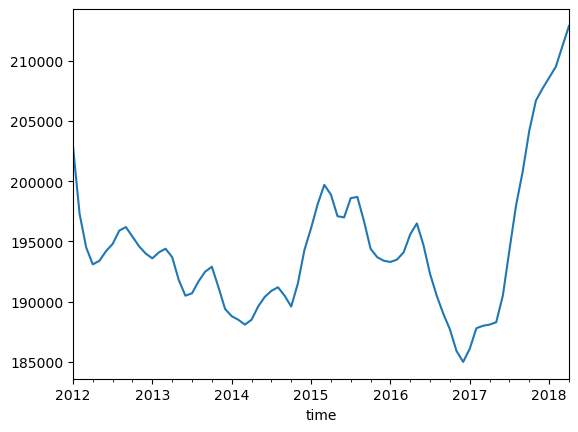

In [1121]:
zipdf = ad_2012[ad_2012.RegionName==10993].value

train = zipdf[zipdf.index<'2017-01-01']
test = zipdf[zipdf.index>'2016-12-01']
zipdf.plot()

In [1122]:
st = time.time()

aics, bics = [], []
train_mses, test_mses = [], []
ad_pvalue_before, ad_pvalue_after = [], []
kpss_pvalue_before, kpss_pvalue_after = [], []
train_preds, test_preds, preds = [], [], []
train_mses, test_mses = [], []

for i in range(len(tups)):
    tup = tups[i]
    model = ARIMA(train, order = tuple(tup)).fit()
    aics.append(model.aic)
    bics.append(model.bic)
    
    train_ps = model.predict()
    test_ps = model.get_forecast(steps=16).predicted_mean
    ps = model.get_forecast(steps=28).predicted_mean
    train_preds.append(train_ps)
    test_preds.append(test_ps)
    preds.append(ps)
    
    train_mse = mean_squared_error(train.dropna()[13:], train_ps.dropna()[13:])
    test_mse = mean_squared_error(test.dropna()[13:], test_ps.dropna()[13:])
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
    residuals = train_ps.dropna() - train.dropna()
    
    dftest = adfuller(train)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    ad_pvalue_before.append(dfoutput['p-value'])
    
    dftest = adfuller(residuals)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    ad_pvalue_after.append(dfoutput['p-value'])
    
    clear_output(wait=True)
    print(f"ARIMA model #{i+1}/{len(tups)} done.")

for i in range(len(seasonal_models)):
    m = seasonal_models[i]
    model = SARIMAX(train, order=m[0], seasonal_order=m[1]).fit(disp=False, method='nm')
    aics.append(model.aic)
    bics.append(model.bic)
    
    train_ps = model.predict()
    test_ps = model.get_forecast(steps=16).predicted_mean
    ps = model.get_forecast(steps=28).predicted_mean
    train_preds.append(train_ps)
    test_preds.append(test_ps)
    preds.append(ps)
    
    train_mse = mean_squared_error(train.dropna(), train_ps.dropna())
    test_mse = mean_squared_error(test.dropna(), test_ps.dropna())
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
    residuals = train_ps.dropna() - train.dropna()
    
    dftest = adfuller(train)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    ad_pvalue_before.append(dfoutput['p-value'])
    
    dftest = adfuller(residuals)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    ad_pvalue_after.append(dfoutput['p-value'])
    
    clear_output(wait=True)
    print(f"SARIMAX model #{i+1}/{len(seasonal_models)} done.")
    
elapsed_time = time.time() - st
print("Execution time: " + str(elapsed_time) + " seconds")

# for lst in [aics, bics, train_mses, test_mses, ad_pvalue_before, ad_pvalue_after, train_preds, test_preds, preds]:
#     print(len(lst))

SARIMAX model #49/49 done.
Execution time: 6.5269176959991455 seconds


In [1123]:
grid_search = pd.DataFrame({'model_type': ['ARIMA'] * len(tups) + ['SARIMAX'] * len(seasonal_models), 
              'model_order': [str(i) for i in tups + seasonal_models], 
              'aic': aics, 
              'bic': bics, 
              'train_mse': train_mses, 
              'test_mse': test_mses, 
              'train_pvalue': ad_pvalue_before, 
              'test_pvalue': ad_pvalue_after, 
              'train_preds': train_preds, 
              'test_preds': test_preds, 
              'preds': preds})

grid_search['pvalue_improvement'] = grid_search['test_pvalue']<grid_search['train_pvalue']
grid_search['overfitting'] = np.abs(grid_search['train_mse'] - grid_search['test_mse'])

criterion='aic'
grid_search.sort_values(by=criterion)

,model_type,model_order,aic,bic,train_mse,test_mse,train_pvalue,test_pvalue,train_preds,test_preds,preds,pvalue_improvement,overfitting
22,SARIMAX,"[[0, 1, 1], [0, 1, 0, 12]]",849.498173,853.198468,1.163622e+09,4.774297e+08,0.594511,4.777341e-04,2012-01-01 0.000000 2012-02-01 1976...,2017-01-01 184925.418596 2017-02-01 1851...,2017-01-01 184925.418596 2017-02-01 1851...,True,6.861924e+08
43,SARIMAX,"[[1, 1, 0], [0, 1, 0, 12]]",849.850204,853.550499,1.164775e+09,4.776130e+08,0.594511,4.913041e-04,2012-01-01 0.000000 2012-02-01 1978...,2017-01-01 184922.584000 2017-02-01 1851...,2017-01-01 184922.584000 2017-02-01 1851...,True,6.871621e+08
50,SARIMAX,"[[1, 1, 1], [0, 1, 0, 12]]",850.454713,856.005156,1.147498e+09,4.761819e+08,0.594511,3.763494e-04,2012-01-01 0.000000 2012-02-01 1964...,2017-01-01 184941.220261 2017-02-01 1851...,2017-01-01 184941.220261 2017-02-01 1851...,True,6.713164e+08
23,SARIMAX,"[[0, 1, 1], [0, 1, 1, 12]]",851.466997,857.017440,1.161315e+09,4.770473e+08,0.594511,4.793460e-04,2012-01-01 0.000000 2012-02-01 1976...,2017-01-01 184927.964490 2017-02-01 1851...,2017-01-01 184927.964490 2017-02-01 1851...,True,6.842676e+08
44,SARIMAX,"[[1, 1, 0], [0, 1, 1, 12]]",851.964503,857.514945,1.162027e+09,4.781442e+08,0.594511,4.642822e-04,2012-01-01 0.000000 2012-02-01 1977...,2017-01-01 184919.517517 2017-02-01 1851...,2017-01-01 184919.517517 2017-02-01 1851...,True,6.838826e+08
51,SARIMAX,"[[1, 1, 1], [0, 1, 1, 12]]",852.224189,859.624780,1.159509e+09,4.774271e+08,0.594511,4.296166e-04,2012-01-01 0.000000 2012-02-01 1974...,2017-01-01 184928.046687 2017-02-01 1851...,2017-01-01 184928.046687 2017-02-01 1851...,True,6.820823e+08
47,SARIMAX,"[[1, 1, 0], [1, 1, 0, 12]]",853.259092,858.809535,1.148207e+09,4.720745e+08,0.594511,6.013524e-04,2012-01-01 0.000000 2012-02-01 1986...,2017-01-01 184957.892313 2017-02-01 1851...,2017-01-01 184957.892313 2017-02-01 1851...,True,6.761320e+08
15,SARIMAX,"[[0, 1, 0], [0, 1, 0, 12]]",854.578142,856.428289,1.181734e+09,4.787281e+08,0.594511,7.151842e-04,2012-01-01 0.000000 2012-02-01 2029...,2017-01-01 184900.0 2017-02-01 185100.0 ...,2017-01-01 184900.0 2017-02-01 185100.0 ...,True,7.030062e+08
16,SARIMAX,"[[0, 1, 0], [0, 1, 1, 12]]",856.480925,860.181221,1.177643e+09,4.773757e+08,0.594511,7.425742e-04,2012-01-01 0.000000 2012-02-01 2029...,2017-01-01 184908.736305 2017-02-01 1851...,2017-01-01 184908.736305 2017-02-01 1851...,True,7.002672e+08
19,SARIMAX,"[[0, 1, 0], [1, 1, 0, 12]]",856.484773,860.185068,1.177980e+09,4.774531e+08,0.594511,7.418050e-04,2012-01-01 0.000000 2012-02-01 2029...,2017-01-01 184908.294207 2017-02-01 1851...,2017-01-01 184908.294207 2017-02-01 1851...,True,7.005266e+08


In [1124]:
row = grid_search.sort_values(by=criterion).iloc[1]
row.overfitting/row.train_mse, row.overfitting/row.test_mse

(0.589952629495506, 1.438742623247819)

[[0, 1, 1], [0, 1, 0, 12]]


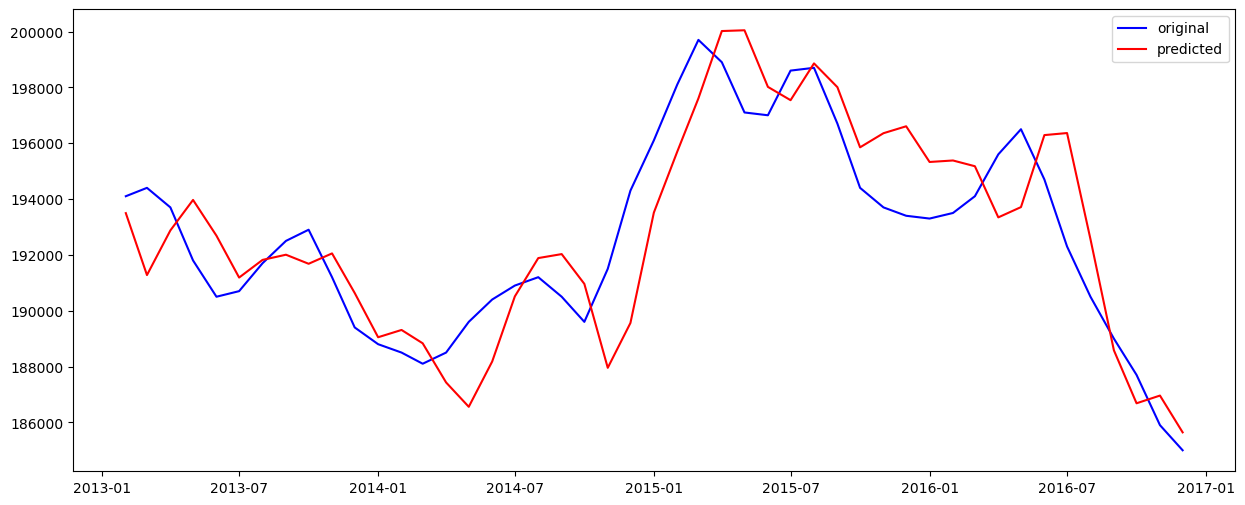

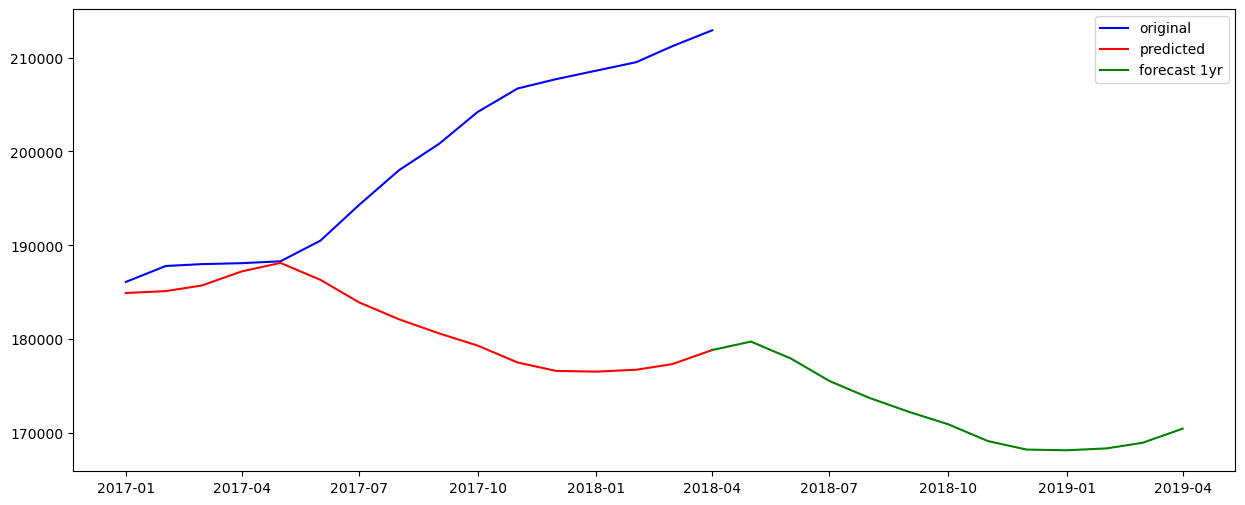

In [1125]:
n=0

print(grid_search.sort_values(by=criterion).iloc[n].model_order)

fig, ax= plt.subplots(figsize=(15,6))
ax.plot(train[13:], color='blue', label='original')
ax.plot(grid_search.sort_values(by=criterion).iloc[n].train_preds[13:], color='red', label='predicted')
ax.legend()

fig, ax= plt.subplots(figsize=(15,6))
ax.plot(test, color='blue', label='original')
ax.plot(grid_search.sort_values(by='aic').iloc[n].test_preds, color='red', label='predicted')
ax.plot(grid_search.sort_values(by=criterion).iloc[n].preds[15:], color='green', label='forecast 1yr')
ax.legend()

In [1138]:
michigan = df[df.State=="MI"].groupby('time').aggregate({'value':'mean'})

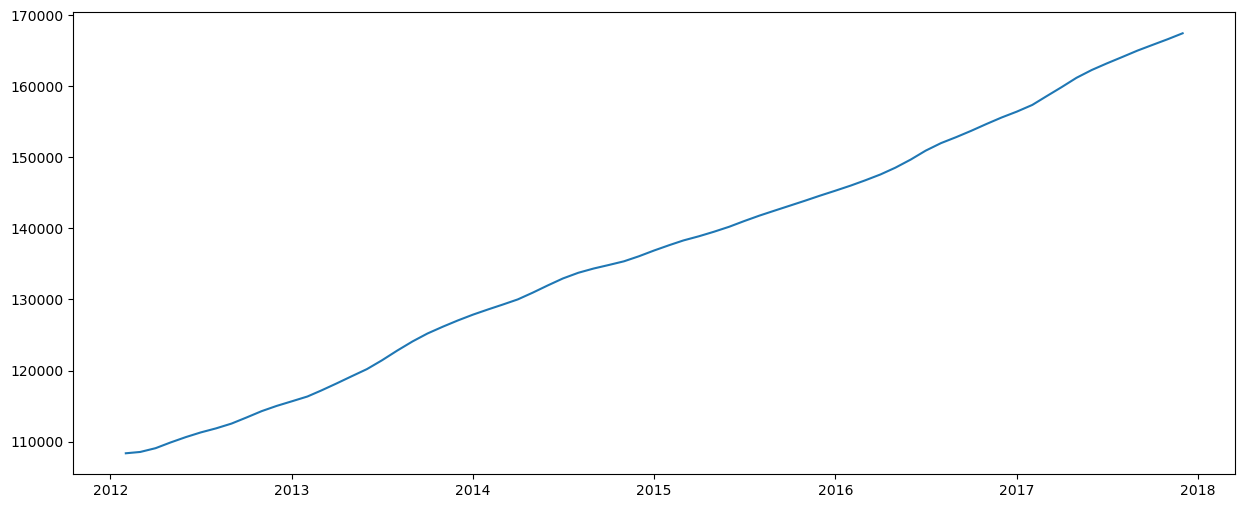

In [1147]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(michigan.query("index>'2012-01-01' & index<'2018-01-01'"))